In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
city_data = pd.read_csv('./DataSets-main/City.csv')
cab_data = pd.read_csv('./DataSets-main/Cab_Data.csv')
customer_data = pd.read_csv('./DataSets-main/Customer_ID.csv')
transaction_data = pd.read_csv('./DataSets-main/Transaction_ID.csv')

In [8]:
print("Cab Data:")
print(cab_data.head(), "\n")

print("City Data:")
print(city_data.head(), "\n")

print("Customer Data:")
print(customer_data.head(), "\n")

print("Transaction Data:")
print(transaction_data.head(), "\n")

Cab Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776   

City Data:
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247  

Customer Data:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   

In [9]:
print("Cab Data Info:")
print(cab_data.info(), "\n")

print("City Data Info:")
print(city_data.info(), "\n")

print("Customer Data Info:")
print(customer_data.info(), "\n")

print("Transaction Data Info:")
print(transaction_data.info(), "\n")

Cab Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None 

City Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
None 

Customer Data Info:
<

In [10]:
# Convert Population and Users columns to integers in City.csv
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

In [11]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='D', origin='1899-12-30')

In [12]:
print(city_data.head())
print(cab_data.head())

             City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [13]:
# Merge datasets
merged_data = cab_data.merge(transaction_data, on='Transaction ID').merge(customer_data, on='Customer ID').merge(city_data, on='City')

# Check the merged data
print(merged_data.head())
print(merged_data.info())


   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month)  Population  Users  
0               10813      814885  24701  
1                9237      814885  24701  
2    

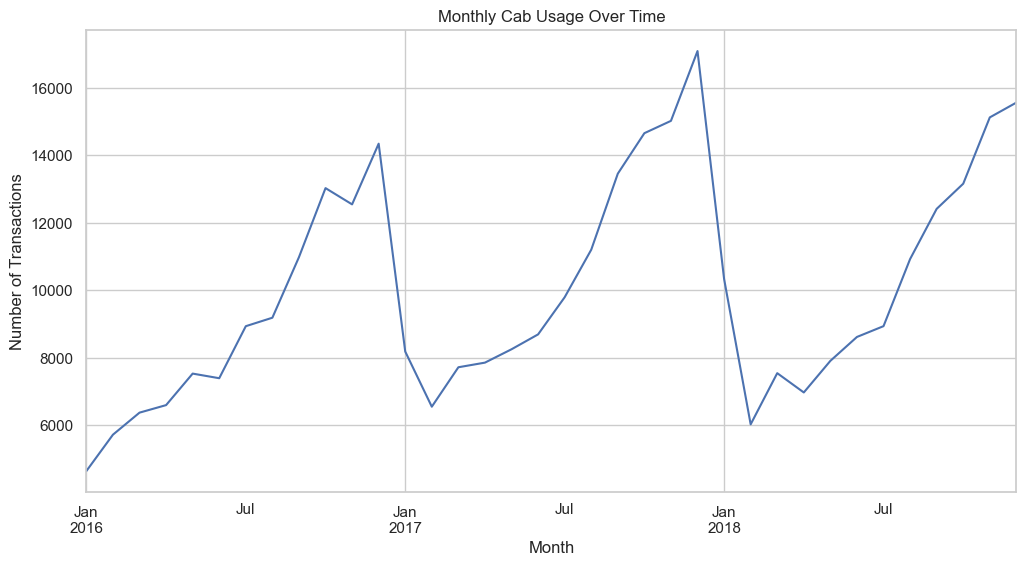

In [14]:
sns.set(style="whitegrid")

# Plot seasonality in cab usage
merged_data['Month'] = merged_data['Date of Travel'].dt.to_period('M')
monthly_usage = merged_data.groupby('Month').size()

plt.figure(figsize=(12, 6))
monthly_usage.plot()
plt.title('Monthly Cab Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

<Figure size 1200x600 with 0 Axes>

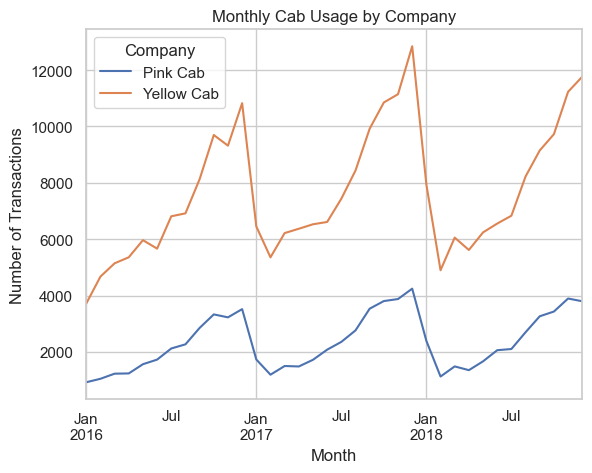

In [15]:
company_usage = merged_data.groupby(['Month', 'Company']).size().unstack()

plt.figure(figsize=(12, 6))
company_usage.plot()
plt.title('Monthly Cab Usage by Company')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


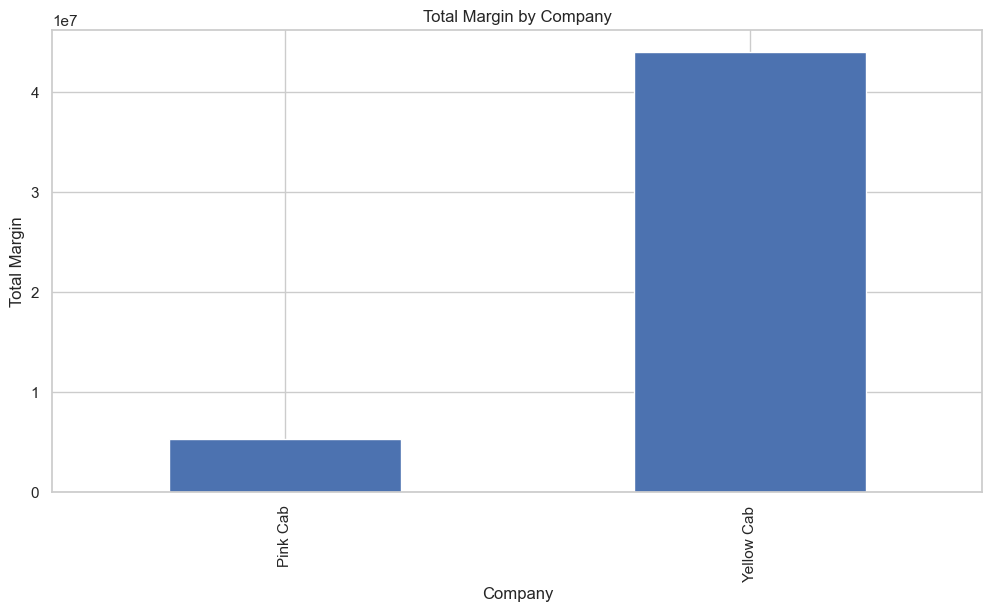

In [16]:
merged_data['Margin'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
company_margin = merged_data.groupby('Company')['Margin'].sum()

plt.figure(figsize=(12, 6))
company_margin.plot(kind='bar')
plt.title('Total Margin by Company')
plt.xlabel('Company')
plt.ylabel('Total Margin')
plt.show()

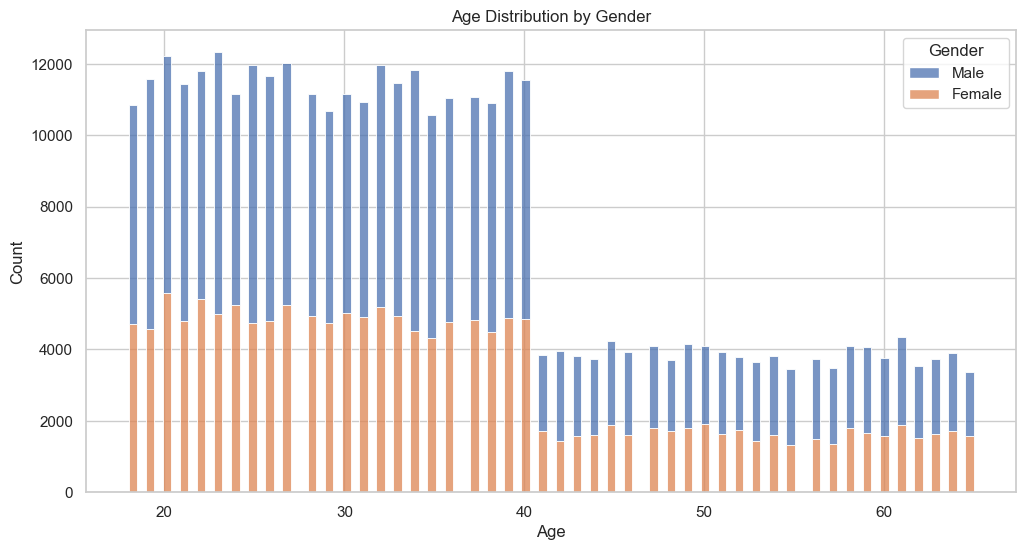

In [18]:
# Customer demographics
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='Age', hue='Gender', multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

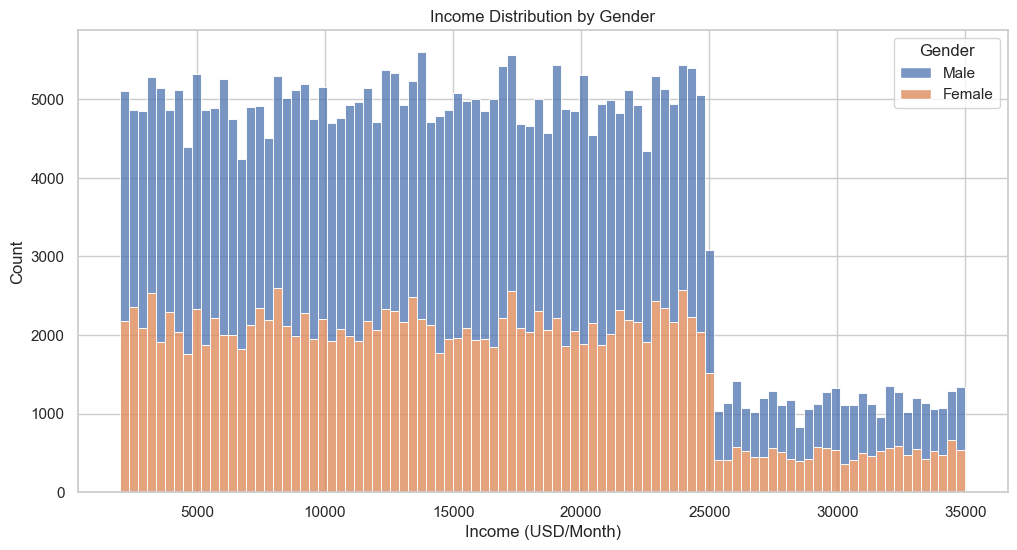

In [19]:

plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='Income (USD/Month)', hue='Gender', multiple='stack')
plt.title('Income Distribution by Gender')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Count')
plt.show()

In [25]:
# Ensure 'Margin' calculation
merged_data['Margin'] = merged_data['Price Charged'] - merged_data['Cost of Trip']

# Verify 'Margin' column exists
print("Columns in the merged DataFrame after adding 'Margin':")
print(merged_data.columns)


Columns in the merged DataFrame after adding 'Margin':
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Month',
       'Margin'],
      dtype='object')


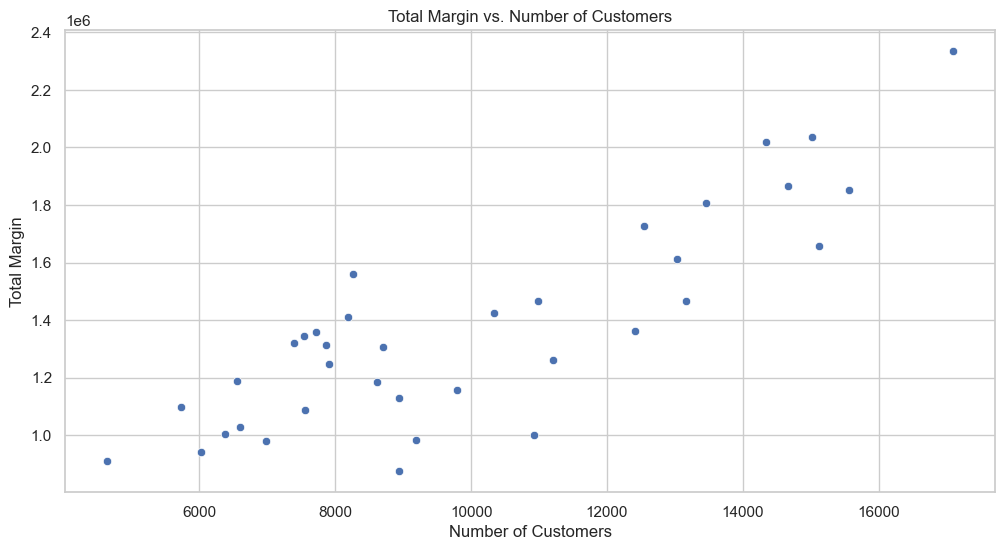

Correlation between total margin and number of customers: 0.842539184646132


In [27]:
# Calculate total margin and number of customers per month
monthly_margin = merged_data.groupby(['Month', 'Company'])['Margin'].sum().unstack()
monthly_customers = merged_data.groupby(['Month', 'Company']).size().unstack()

# Plot margin vs. number of customers
plt.figure(figsize=(12, 6))
sns.scatterplot(x=monthly_customers.sum(axis=1), y=monthly_margin.sum(axis=1))
plt.title('Total Margin vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Total Margin')
plt.show()

# Calculate correlation between margin and number of customers
correlation = monthly_customers.sum(axis=1).corr(monthly_margin.sum(axis=1))
print(f"Correlation between total margin and number of customers: {correlation}")


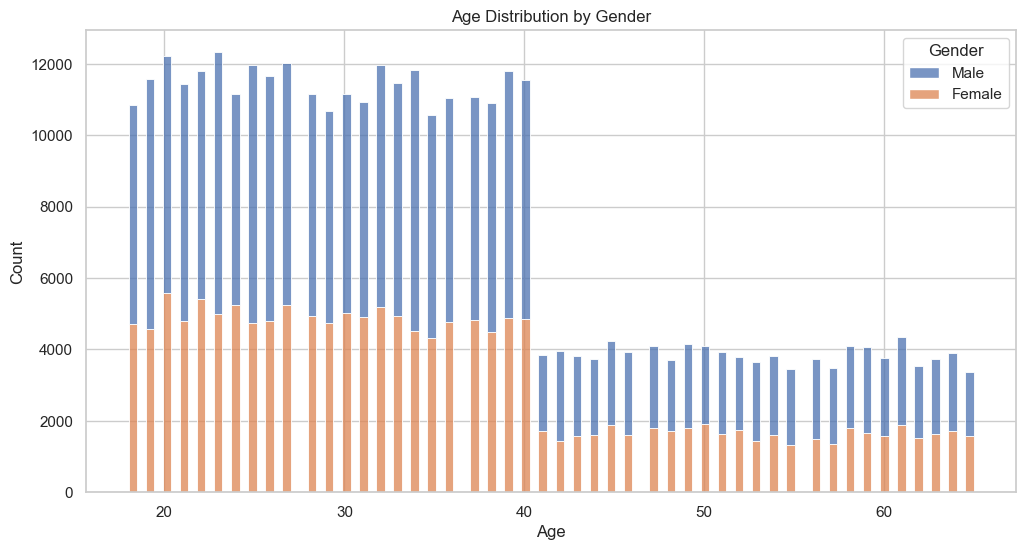

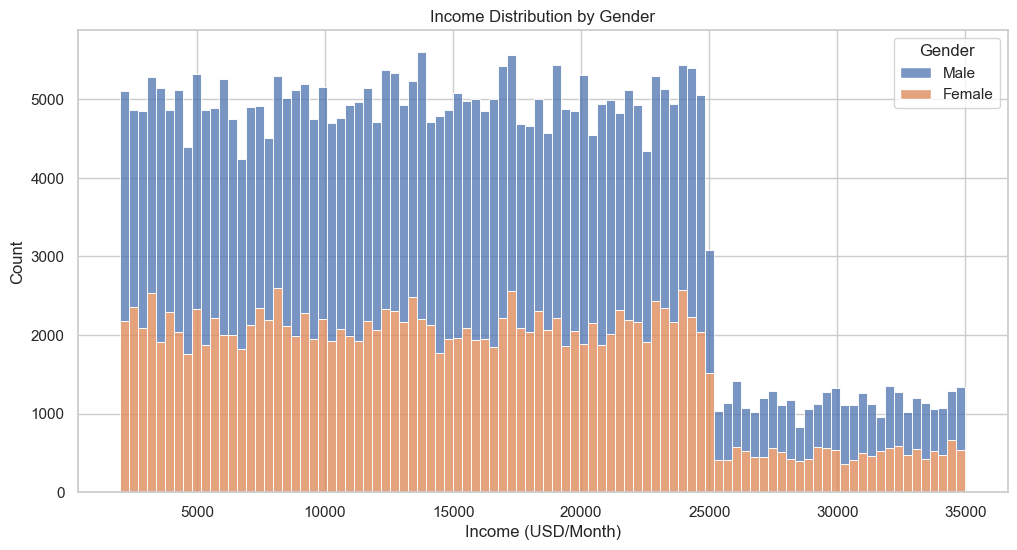

Age statistics:
count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

Income statistics:
count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64


In [28]:
# Plot age distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='Age', hue='Gender', multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot income distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='Income (USD/Month)', hue='Gender', multiple='stack')
plt.title('Income Distribution by Gender')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Count')
plt.show()

# Calculate descriptive statistics for age and income
age_stats = merged_data['Age'].describe()
income_stats = merged_data['Income (USD/Month)'].describe()

print("Age statistics:")
print(age_stats)
print("\nIncome statistics:")
print(income_stats)


In [36]:
city_usage = merged_data.groupby('City').size()
city_usage

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
dtype: int64

In [37]:
merged_data = cab_data.merge(transaction_data, on='Transaction ID').merge(customer_data, on='Customer ID').merge(city_data, on='City')
merged_data['Margin'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
merged_data['Month'] = merged_data['Date of Travel'].dt.to_period('M')


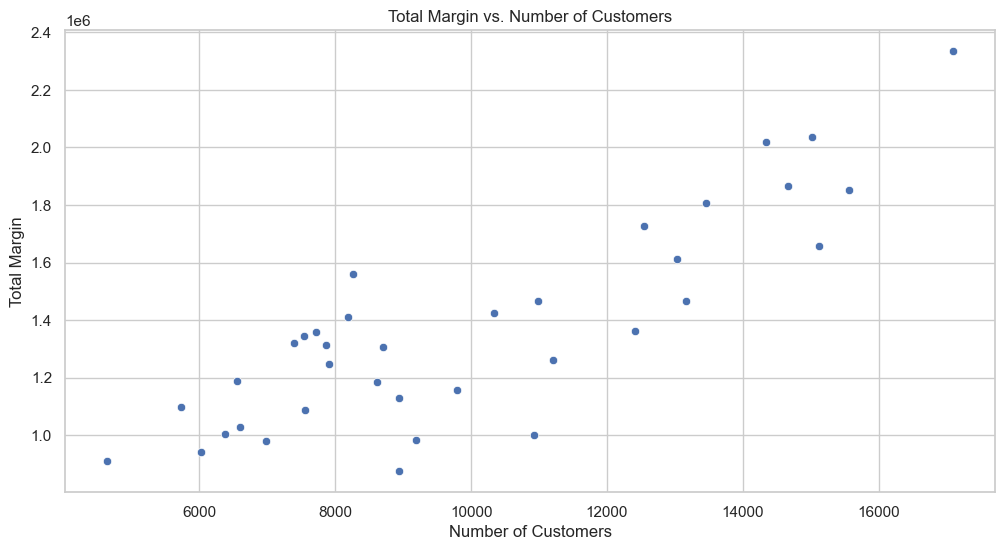

Correlation between total margin and number of customers: 0.842539184646132


In [39]:
# Hypothesis 3: Revenue and Margin Trends
monthly_margin = merged_data.groupby(['Month', 'Company'])['Margin'].sum().unstack()
monthly_customers = merged_data.groupby(['Month', 'Company']).size().unstack()
plt.figure(figsize=(12, 6))
sns.scatterplot(x=monthly_customers.sum(axis=1), y=monthly_margin.sum(axis=1))
plt.title('Total Margin vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Total Margin')
plt.show()
correlation = monthly_customers.sum(axis=1).corr(monthly_margin.sum(axis=1))
print(f"Correlation between total margin and number of customers: {correlation}")


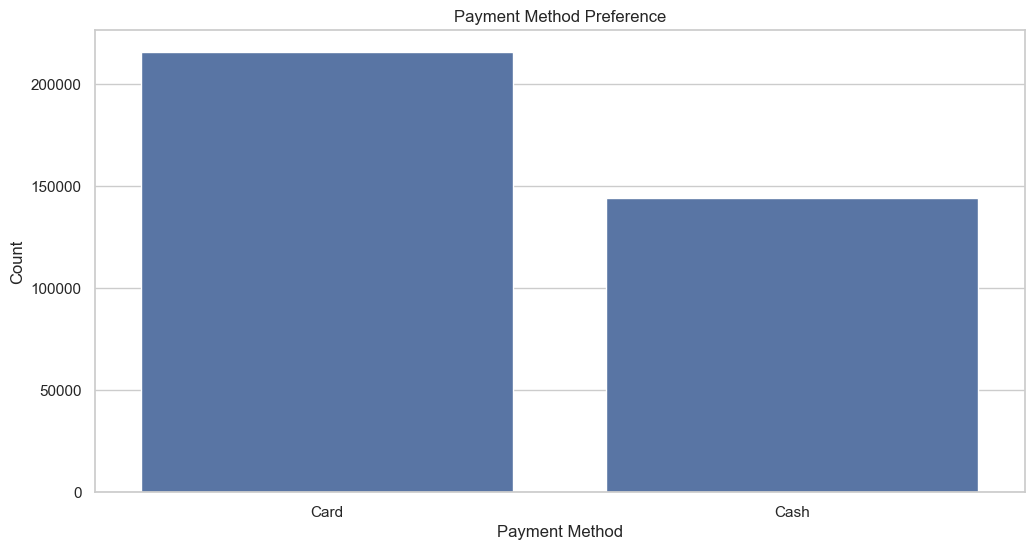

In [43]:
payment_method_counts = merged_data['Payment_Mode'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Payment Method Preference')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

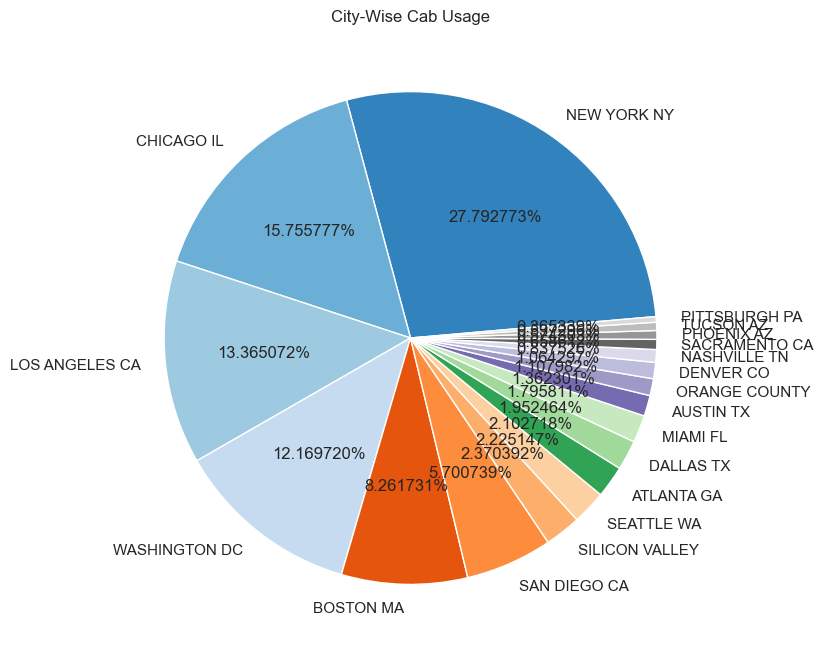

In [50]:
city_usage = merged_data['City'].value_counts()

plt.figure(figsize=(12, 8))
city_usage.plot(kind='pie', autopct='%1f%%', startangle=5, colormap='tab20c')
plt.title('City-Wise Cab Usage')
plt.ylabel('')  # Hide the y-label
plt.show()

/var/folders/k9/d1czdmc507s2_10s7xd2m8200000gn/T/ipykernel_1644/31059335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_usage.index, y=gender_usage.values, palette='pastel')


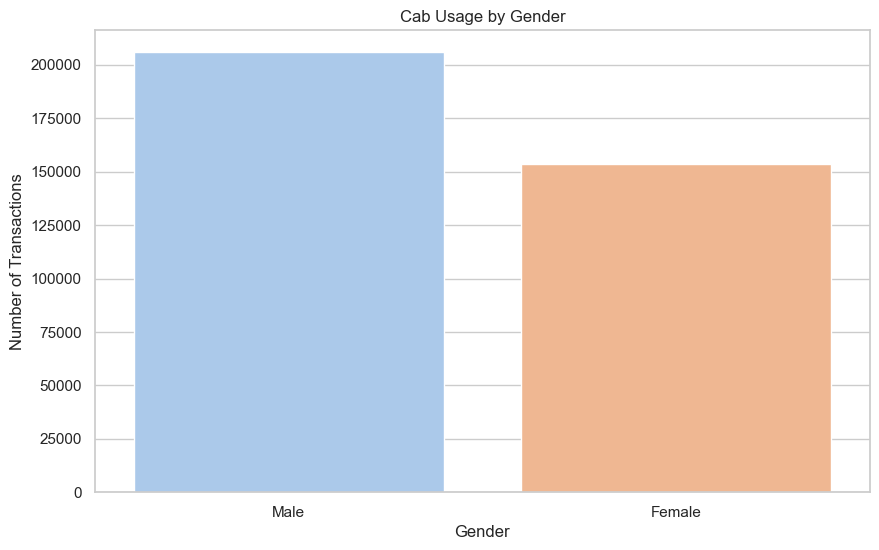

In [51]:
gender_usage = merged_data['Gender'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_usage.index, y=gender_usage.values, palette='pastel')
plt.title('Cab Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()